<a href="https://colab.research.google.com/github/nrjkumar/nrjkumar.github.io/blob/master/enghindibilingualbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1dpBDxgUefLnKvMKGG1dDOS1_sqPvmCEr' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)


title: bilingual_bert2.pth, id: 1d92-zqEoElt0BS-UguLG4bKbi_jOJsTk
downloading to /root/data/bilingual_bert2.pth
title: kaggle.json, id: 1inUvpnOgpmvJcCVE1mj1TuzGAx8QjjK_
downloading to /root/data/kaggle.json


In [ ]:
!ls /root/data/

bilingual_bert2.pth  kaggle.json


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
sentences = []
labels = []

with open("dupremHinglishtext.txt") as senfile:
  sentences = senfile.readlines()

with open("dupremLabels.txt") as labfile:
  labels = labfile.readlines()

In [ ]:
print(len(sentences))
print(len(labels))

8343
8343


In [ ]:
for i in range(len(sentences)):
  sentences[i] = sentences[i].rstrip()

print(sentences)

['king इसी भारत म 40 करो-हे मुसलिमा भी हैं', 'चौदरे सारा कश्मीर हमारा हैं', 'हैं कौन-सा धर्म दूसरे लोगों को बुरे नजर से देखना सिखाता हैं दुनिया को kounse धर्म के लोग परेशाँ कर रहे हैं उस धर्म के लोगों के बुराई का अन्त honewala हैं', 'सिंह मतलब भाई आपके पीचे कौन', 'इंडिया me law बनने वाला हैं 1 man 1 children', 'उर रहमान मुसलमानो का पूरा इतिहास नोमन्सुकिमत को मरना उनके worship temple को तोड़ने से बैरा हैं सू चूहे खा के बिल्ली haj को चलि', 'कश्मीर मेरा था हैं rhega तेरे बोलने से क्या होता हैं तु अपना पाकिस्तान देख i म indian मुसलिम ok', 'इंडिया will burn', 'यह साले मादरचोद अरब rape बचे है kya?', 'china, rewrite कुरान अब क्या करेगा पाकिस्तान', 'try try try again try', 'sheryar सुन be katuve bakarichod मादरचोद तेरा अल्ला ऐसा ही ग़ज़वा ए हिंद jsise attack की dhamaki देगा to तेरे अल्ला के गांड कितने type का बाँस हम लोग ghused देँगे इसका अंदाज़ा तेरे अल्ला को भी नही होगा अल्ला को ग़ज़वा ए हिंद करना हैं to अल्ला जा के अपनी माँ के भोसड़ी में जा के करे karaye इधर इंडिया की तरफ़ तेरा अल्ला karayega 

In [ ]:
for i in range(len(labels)):
  labels[i] = int(labels[i].rstrip())

print(labels)

[0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 

In [ ]:
!pip install transformers

     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 13.8MB/s 
     |████████████████████████████████| 890kB 19.0MB/s 
     |████████████████████████████████| 3.0MB 24.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=7d227271bcc69ad2ef38caaa534a64b779bd717fcd57a65110e2692c3c469f67
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import transformers

custom_tokenizer = transformers.BertTokenizer(
    vocab_file = "hinglish-vocab.txt",
    do_lower_case = True
)

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[5000])

# Print the sentence split into tokens.
print('Tokenized: ', custom_tokenizer.tokenize(sentences[5000]))

# Print the sentence mapped to token ids.
print('Token IDs: ', custom_tokenizer.convert_tokens_to_ids(custom_tokenizer.tokenize(sentences[5000])))

 Original:  you can कोन्देरु any country not इंडिया fuck इस्लाम जय मोदी जी जय श्री राम
Tokenized:  ['you', 'can', 'कोन', '##दर', 'any', 'country', 'not', 'इडिया', 'fuck', 'इसलाम', 'जय', 'मोदी', 'जी', 'जय', 'शरी', 'राम']
Token IDs:  [460, 795, 2735, 828, 889, 717, 573, 470, 1562, 570, 548, 695, 758, 548, 1228, 1135]


In [ ]:
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = custom_tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  1202


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = custom_tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,
                        truncation = True,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  king इसी भारत म 40 करो-हे मुसलिमा भी हैं
Token IDs: tensor([   2, 2657,  894,  738,  103, 3089,  673,    7,  112, 9565,  478,  112,
           4,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  

In [ ]:
print(input_ids)
print(len(input_ids))
print(len(input_ids[0]))

tensor([[   2, 2657,  894,  ...,    0,    0,    0],
        [   2, 5425,  828,  ...,    0,    0,    0],
        [   2,  112,  995,  ...,    0,    0,    0],
        ...,
        [   2,   99, 1244,  ...,    0,    0,    0],
        [   2,  112,  885,  ...,    0,    0,    0],
        [   2, 2292, 1293,  ...,    0,    0,    0]])
8343
512


In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

7,508 training samples
  835 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 10

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
!wget https://storage.googleapis.com/bert_models/2018_11_03/multilingual_L-12_H-768_A-12.zip
!unzip /content/multilingual_L-12_H-768_A-12.zip

--2020-07-15 06:03:25--  https://storage.googleapis.com/bert_models/2018_11_03/multilingual_L-12_H-768_A-12.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 64.233.187.128, 64.233.188.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 623781697 (595M) [application/zip]
Saving to: ‘multilingual_L-12_H-768_A-12.zip’

multilingual_L-12_H 100%[===================>] 594.88M  92.8MB/s    in 7.4s    

2020-07-15 06:03:34 (80.4 MB/s) - ‘multilingual_L-12_H-768_A-12.zip’ saved [623781697/623781697]

Archive:  /content/multilingual_L-12_H-768_A-12.zip
   creating: multilingual_L-12_H-768_A-12/
  inflating: multilingual_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: multilingual_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: multilingual_L-12_H-768_A-12/vocab.txt  
  inflating: multilingual_L-12_H-768_A-12/bert_model.ckpt.index  
  i

In [ ]:
import argparse
import logging
import transformers
import torch
from transformers import BertConfig,  BertForSequenceClassification, BertForPreTraining, load_tf_weights_in_bert

config = BertConfig.from_json_file("/content/multilingual_L-12_H-768_A-12/bert_config.json")
config.num_labels = 3
model = BertForSequenceClassification(config)
model.load_state_dict(torch.load("/root/data/bilingual_bert2.pth"))
print(model.eval())

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (105879, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 5

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
model = model.to(device)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 5 ========
Training...
  Batch    40  of    751.    Elapsed: 0:01:08.
  Batch    80  of    751.    Elapsed: 0:02:15.
  Batch   120  of    751.    Elapsed: 0:03:23.
  Batch   160  of    751.    Elapsed: 0:04:31.
  Batch   200  of    751.    Elapsed: 0:05:39.
  Batch   240  of    751.    Elapsed: 0:06:47.
  Batch   280  of    751.    Elapsed: 0:07:54.
  Batch   320  of    751.    Elapsed: 0:09:02.
  Batch   360  of    751.    Elapsed: 0:10:10.
  Batch   400  of    751.    Elapsed: 0:11:18.
  Batch   440  of    751.    Elapsed: 0:12:25.
  Batch   480  of    751.    Elapsed: 0:13:33.
  Batch   520  of    751.    Elapsed: 0:14:41.
  Batch   560  of    751.    Elapsed: 0:15:49.
  Batch   600  of    751.    Elapsed: 0:16:57.
  Batch   640  of    751.    Elapsed: 0:18:04.
  Batch   680  of    751.    Elapsed: 0:19:12.
  Batch   720  of    751.    Elapsed: 0:20:20.

  Average training loss: 0.88
  Training epcoh took: 0:21:12

Running Validation...
  Accuracy: 0.60
  Validat

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.88,0.82,0.60,0:21:12,0:00:50
2,0.74,0.68,0.70,0:21:13,0:00:50
3,0.61,0.69,0.70,0:21:13,0:00:50
4,0.50,0.71,0.72,0:21:12,0:00:50
5,0.42,0.73,0.73,0:21:12,0:00:50


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


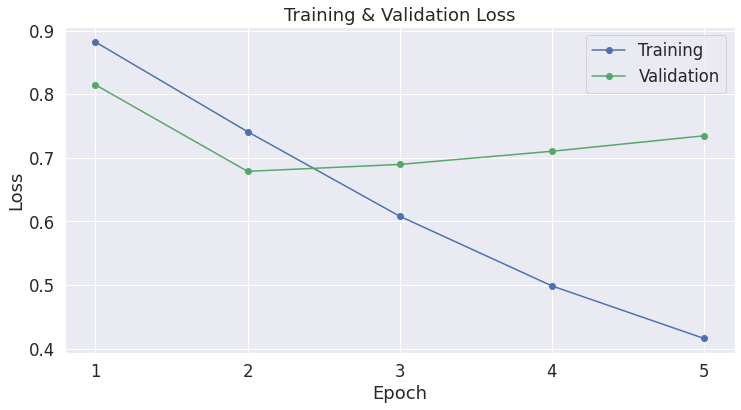

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4, 5])

plt.show()

In [ ]:
senttest = []
labtest = []

with open("duptestHinglishtext.txt") as senfile:
  senttest = senfile.readlines()

with open("duptestHinglishlabels.txt") as labfile:
  labtest = labfile.readlines()
  

In [ ]:
df_Test = pd.read_csv("newtestlist.csv")
senttest = df_Test["Text"]
labtest = df_Test["Labels"]

In [ ]:
sent_test = []

In [ ]:
for i in range(len(senttest)):
  sent_test.append(senttest[i].rstrip())

print(sent_test)

['attack bro में हिंदू हूँ इंडिया में सब हिंदू मुसलिम भाई की तरह रहते hai, अल्ला सब को खुश रखे', 'मुझे तब जलन होता हैं जब कोई इंडिया मुसलिमा बोलता हैं पाकिस्तान के लिये', 'कुमर कुरान अल्ला की book हैं see this थेटप यूतू be dyiumxpsl9w', 'what?? russian forces with pakistan?? day dreaming is good but this guy is high on weed', 'भट्ट जो जन्म लेता हैं उसे एक दिन मरना ही हैं ये धरती भी एक दिन नष्ट हो जाएगी सारा ब्रह्मांड ख़त्म हो जायेगा क्यों की जन्म का मृत्यु से रिश्ता हैं पदमदु bomb भी एक दिन उसे होने के लिये ही बनें हैं', 'अच्छा कहा sister', 'सालों पाकिस्तान से मुक़ाबला करते हो पहले अपनी gastiyan to सँभाल लो जो baher out of cuntory जा के पाकिस्तानी boys का लौडा chos ते हैं इंडिया सिर्फ़ gasti बना सकता he', 'इंशाल्ला सब्र करो firun आया musfa भी जरूर आते इंशाल्ला अल्ला आप k साथ अपनी hifazt करो', 'मेरा louda,,,,,ab to लंड भी ने बनेगा पाकिस्तान', 'aslam अबे bhosadi के madarchod, ओ शैतान मादरचोद अल्ला ग़ज़वा ए हिंद जैसा खून kuaraba जैसे concept लिख कर के बहोट बड़ी गलती ही नही बल्कि हम लोगों को 

In [ ]:
lab_test = []

In [ ]:
for i in range(len(labtest)):
  lab_test.append(int(labtest[i]))

print(lab_test)

[1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids2 = []
attention_masks2 = []

# For every sentence...
for sent2 in sent_test:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict2 = custom_tokenizer.encode_plus(
                        sent2,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 512,           # Pad & truncate all sentences.
                        truncation = True,
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids2.append(encoded_dict2['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks2.append(encoded_dict2['attention_mask'])

# Convert the lists into tensors.
input_ids2 = torch.cat(input_ids2, dim=0)
attention_masks2 = torch.cat(attention_masks2, dim=0)
labtest2 = torch.tensor(lab_test)

# Set the batch size.  
batch_size = 10

# Create the DataLoader.
prediction_data = TensorDataset(input_ids2, attention_masks2, labtest2)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [ ]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids2)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 2,000 test sentences...
    DONE.


In [ ]:
print(predictions[0])
print(predictions[0][0])
print(predictions[0][1])
print(max(predictions[0][2]))
print(list(predictions[0][2]).index(max(predictions[0][2])))

[[-1.1913954   1.7407517  -0.19168214]
 [-0.94600475  1.9903277  -0.69704384]
 [ 2.5554285  -2.3387291  -0.25954852]
 [ 0.97862023  0.92666227 -1.7077333 ]
 [-0.6280891   1.8595002  -0.8992309 ]
 [ 3.5691178  -2.0208337  -1.684839  ]
 [-1.8311359   2.062781    0.10141408]
 [ 2.9641478  -2.8049114  -0.31407627]
 [-0.54472405  2.1493523  -1.3209414 ]
 [-1.5714097   2.5907547  -0.6769592 ]]
[-1.1913954   1.7407517  -0.19168214]
[-0.94600475  1.9903277  -0.69704384]
2.5554285
0


In [ ]:
plabelstest = []

for i in range(len(predictions)):
  for j in range(len(predictions[i])):
    plabelstest.append(int(list(predictions[i][j]).index(max(predictions[i][j]))))


print(len(plabelstest))
print(plabelstest)

2000
[1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 0

In [ ]:
counter = 0

for i in range(len(labtest)):
  if labtest[i] == plabelstest[i]:
    counter += 1

print(counter)
print(counter/len(labtest)*100.0)

1431
71.55


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
print(len(matthews_set))

200


In [ ]:
print(matthews_set)

[0.32995600879804493, 0.21678713743864778, 0.4824506406770077, 0.596583045392057, 0.5470476064693477, 0.5443310539518174, 0.5539117094069973, 0.5443310539518174, 0.6969627833961297, 0.5499719409228703, 0.7077760731311632, 0.6001623968133339, -0.07715167498104596, 0.7276068751089989, 0.5443310539518174, 0.6788442333021307, 0.8398214856229393, 0.8468438840298473, 0.5503058104211829, 0.5443310539518174, 0.35355339059327373, 0.39477101697586137, 0.1466471150213533, 0.7302507302510953, 0.7349684152591671, 0.7170651469124504, 0.3183275016660837, 0.4256282653793743, 0.3367876570272817, 0.7034685744158127, 0.6254627916220946, 0.14980117725462763, 0.5212860351426869, 0.4811252243246881, 0.733741080561577, 0.5629716863888062, 0.2182178902359924, 0.7349684152591671, 0.8485552916276634, 0.3275862068965517, 0.8365019125713041, 0.7819290527140305, 0.05360562674188975, 0.6788442333021307, 0.8365019125713041, 0.15713484026367722, 0.6, 0.5185185185185185, 0.8448275862068966, 0.6092717958449424, 0.51066

In [ ]:
newmath = matthews_set[170:191]
print(newmath)
print(len(newmath))

[0.5695214286468868, 0.47280542884465016, 0.2847607143234434, 0.8398214856229393, 0.3592106040535498, 0.7147416898918633, 0.4377137796365057, 0.41097647168782137, 0.8398214856229393, 0.5243041203911967, 0.8356290217967334, 0.4423258684646914, 0.35737084494593163, 0.7819290527140305, 0.8485552916276634, 0.5471422245456321, 0.6969627833961297, 0.6048884885927481, 0.3183275016660837, 0.6384423980690614, 0.7147416898918633]
21


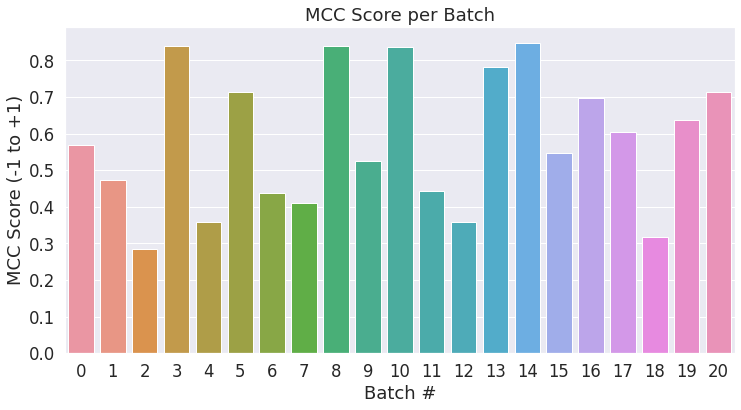

In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
ax = sns.barplot(x=list(range(len(newmath))), y=newmath, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.546
